# Predict Covid-19 with deep-learning

*by: Stańdo Jacek

In [2]:
from fastai.vision import *

## View data

['covid', 'normal', 'pneumonia'] Train images:  288  Validation images:  71
None


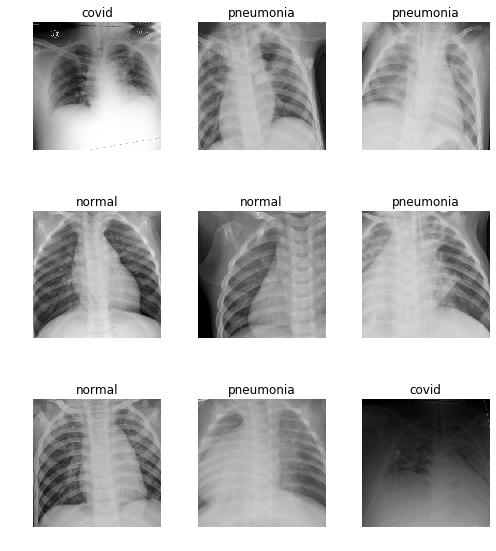

In [11]:
np.random.seed(42)
path = r"E:\CTCovidData\data"
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

print(data.classes,"Train images: ", len(data.train_ds)," Validation images: " ,len(data.valid_ds))

print(data.show_batch(rows=3, figsize=(7,8)))

## Train model

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])
learn.lr_find()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\CTCovidData\\data\\models\\tmp.pth'

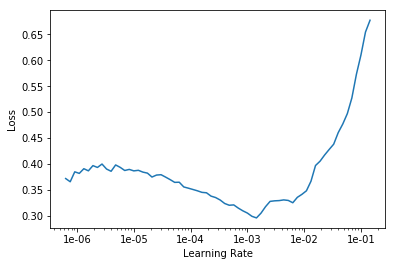

In [14]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(6, max_lr=1e-03)

epoch,train_loss,valid_loss,accuracy,time
0,1.714861,1.694630,0.338028,00:44
1,1.496547,0.866605,0.605634,00:43
2,1.236438,0.511029,0.830986,00:42
3,1.043789,0.421274,0.802817,00:43
4,0.907274,0.406501,0.830986,00:42
5,0.820898,0.408951,0.816901,00:43


In [27]:
learn.save('stage-2')

## Interpretation

In [28]:
learn.load('stage-2');

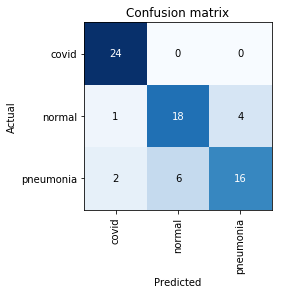

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()